<a href="https://colab.research.google.com/github/queziamirandaDev/Python-para-DataScience/blob/main/15_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão de Negócio


* Qual indicador da saida de funcionarios (TurnOver)
* Se é possivel criar um modelo para prever a chances de um funcionario ser TurnOver

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import aed

In [3]:
df_rh = pd.read_csv('/content/base_rh (1).csv')

df_rh.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2


In [4]:
df_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Funcionario_Deixou_Empresa  1470 non-null   object
 1   Freq_Viagens                1470 non-null   object
 2   Formacao                    1470 non-null   object
 3   Estado_Civil                1470 non-null   object
 4   Faz_hora_extras             1470 non-null   object
 5   Equilibrio_de_Vida          1470 non-null   object
 6   Idade                       1470 non-null   int64 
 7   Tempo_de_empresa            1470 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 92.0+ KB


In [5]:
df_rh.describe().round(2)

,Idade,Tempo_de_empresa
count,1470.00,1470.00
mean,36.92,7.01
std,9.14,6.13
min,18.00,0.00
25%,30.00,3.00
50%,36.00,5.00
75%,43.00,9.00
max,60.00,40.00


In [6]:
df_rh.describe(include='object')

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida
count,1470,1470,1470,1470,1470,1470
unique,2,3,5,3,2,4
top,Não,Viaja raramente,Ensino Superior,Casado,Não,Muito bom
freq,1233,1043,572,673,1054,893


<Axes: xlabel='Formacao'>

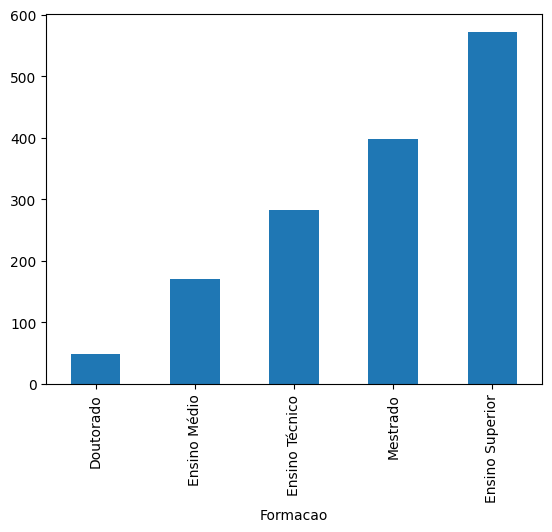

In [7]:
df_rh['Formacao'].value_counts().sort_values().plot(kind='bar')

In [8]:
# AED é um modulo criada para calcular estatistica
# Analise IV = information values é como se fosse correlação

from sklearn.tree import DecisionTreeClassifier, plot_tree  #marchine learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import numpy as np


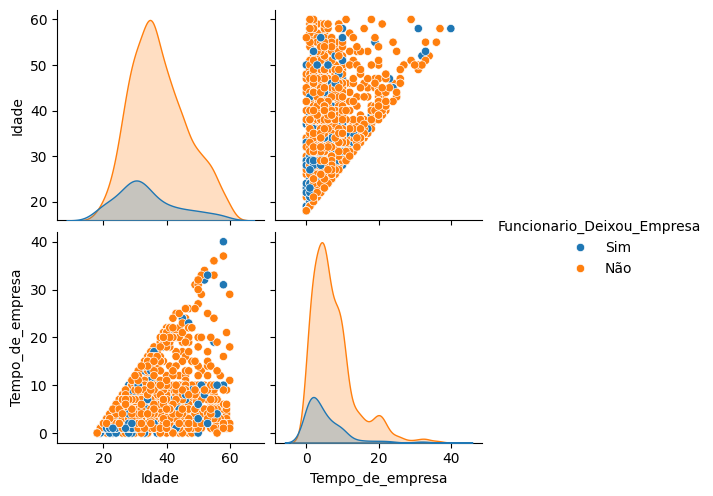

In [9]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')
sns.pairplot(df_rh, hue='Funcionario_Deixou_Empresa')

In [10]:
df_rh['alvo'] = np.where(df_rh['Funcionario_Deixou_Empresa'] == 'Sim',1,0)

df_iv = aed.analise_iv(df_rh, 'alvo')

df_iv.get_lista_iv()

#  0,3 e 0,5 melhores para avaliar ter impacto na analise

/content/aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',


alvo,IV
Variavel,
Funcionario_Deixou_Empresa,9.21
Faz_hora_extras,0.40
Tempo_de_empresa,0.34
Idade,0.31
Estado_Civil,0.22
Freq_Viagens,0.13
Equilibrio_de_Vida,0.06
Formacao,0.01


In [11]:
# transformando as informações de Strings para linguagem de maquina

df_modelo = pd.get_dummies(df_rh)

df_modelo.head()

,Idade,Tempo_de_empresa,alvo,Funcionario_Deixou_Empresa_Não,Funcionario_Deixou_Empresa_Sim,Freq_Viagens_Não viaja,Freq_Viagens_Viaja frequentemente,Freq_Viagens_Viaja raramente,Formacao_Doutorado,Formacao_Ensino Médio,...,Formacao_Mestrado,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,41,6,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
1,49,10,0,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
2,37,0,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,33,8,0,True,False,False,True,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,27,2,0,True,False,False,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False


In [12]:
# Variavel Alvo

y = df_modelo['alvo']

x = df_modelo.drop([
    'alvo',
    'Funcionario_Deixou_Empresa_Sim',
    'Funcionario_Deixou_Empresa_Não'
], axis=1)

In [13]:
# Split Data - Divisão dos dados , sempre dentro de (70%, 30%) à (80%,20%)

X_train,X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)

# Treinamento do modelo

modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Text(0.5, 1.0, 'Estimativa de TurnOver')

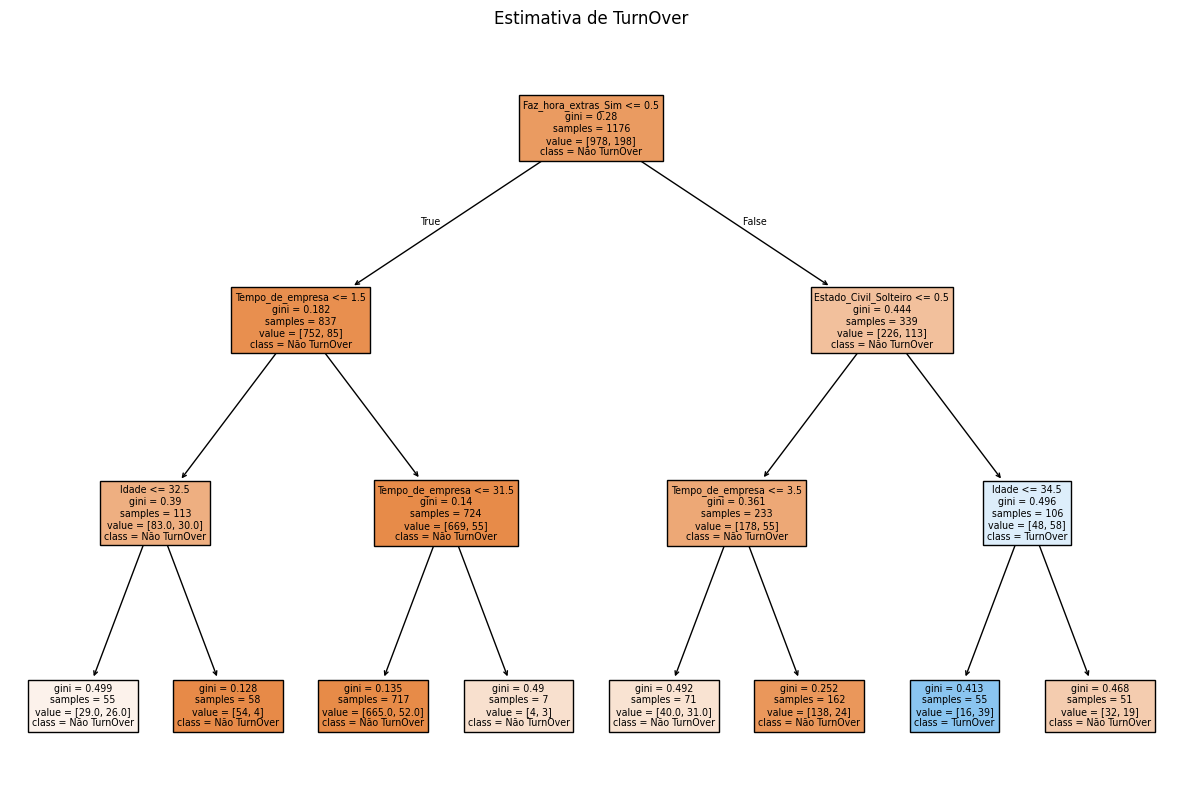

In [14]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(
    modelo,feature_names= features,
    class_names=['Não TurnOver', 'TurnOver'],
    filled=True
)

plt.title('Estimativa de TurnOver')


In [16]:
print(round(accuracy_score(y,modelo.predict(x)), 2))

0.85


In [17]:
y_pred = modelo.predict(X_test)

In [19]:
#print('Acuracia:', accuracy_score(y_train,y_pred))
print('Relatório do modelo:')
print(classification_report(y_test,y_pred))

Relatório do modelo:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       255
           1       0.46      0.15      0.23        39

    accuracy                           0.86       294
   macro avg       0.67      0.56      0.58       294
weighted avg       0.83      0.86      0.83       294

